<a href="https://colab.research.google.com/github/Adrianus-Bagas/Emotion-Detection/blob/main/Emotion_Detection_(Model).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deteksi Emosi Melalui Audio

## 1. Import beberapa libraries

In [1]:
import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
from IPython.display import Audio

import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization, LSTM, GRU
from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

## 2. Memuat data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/dataset/features.csv')
df

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,labels
0,-399.742432,100.436081,9.187292,28.390308,-6.561333,16.537472,-0.138621,-8.180938,1.366691,1.567494,...,-1.330374,-11.792912,14.240981,-11.331120,-1.957271,-1.172745,-0.676887,-5.290711,-3.465883,sad
1,-359.149395,71.894877,17.545031,18.976195,-0.390334,9.577103,1.568283,-6.067213,1.954241,-2.368474,...,-5.174180,-5.000865,7.009338,-6.859118,-5.140312,0.024275,-3.061469,-2.985632,-4.941814,sad
2,-461.433105,93.952171,9.721594,25.440495,-5.660292,16.642614,-3.905573,-8.742842,3.246967,-2.633952,...,-4.004335,-4.990000,13.022542,-15.329729,1.545783,-1.163409,-1.142039,-3.984202,-3.492022,sad
3,-407.631195,99.247940,10.754412,27.849697,2.521706,14.629902,-2.598167,-11.795385,5.944390,-3.853054,...,2.614057,-12.985439,10.140218,-12.777110,-2.410043,-1.422408,-1.650963,-6.968535,-6.341195,sad
4,-307.760183,48.053203,18.740791,11.992347,4.532837,5.695790,-1.903840,-5.020708,1.605943,-2.924321,...,-5.029605,-3.504687,0.704473,-6.390824,-5.708613,-2.521811,-3.925443,-3.800466,-4.812770,sad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,-404.828807,74.550954,16.057916,-4.880032,0.563853,1.578211,-9.109502,-10.532808,-9.339563,-4.653175,...,-8.197384,-5.186045,-1.926364,-2.145762,-1.012196,1.395253,4.627178,1.291640,-5.290825,happy
4796,-544.494141,137.743301,8.655626,-17.808264,-1.746074,2.450433,-18.456900,-14.074989,-13.861665,-3.334609,...,-5.868994,-7.610136,-0.868871,-2.432390,3.335274,-0.408585,4.448386,-5.163003,-9.341989,happy
4797,-471.726929,116.254143,24.741329,-13.907975,-10.322044,3.570961,-6.128961,-3.667096,-17.369890,-3.986244,...,-6.656944,-6.157938,-2.079576,-3.540452,6.148648,-3.185794,9.152263,1.120421,-3.447200,happy
4798,-327.124668,48.649999,15.751025,-5.820897,-7.573235,-1.919178,-1.067227,-5.348863,-8.856018,-8.608043,...,-6.620527,-5.143201,-3.540646,-1.242687,1.519939,2.108145,2.918989,0.778003,-3.033096,happy


In [4]:
print(df["labels"].value_counts())

sad      1200
fear     1200
angry    1200
happy    1200
Name: labels, dtype: int64


In [5]:
X = df.iloc[: ,:-1].values
Y = df['labels'].values

In [6]:
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [7]:
Y

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]])

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3600, 20), (3600, 4), (1200, 20), (1200, 4))

In [9]:
# # scaling our data with sklearn's Standard scaler
# scaler = StandardScaler()
# x_train = scaler.fit_transform(x_train)
# x_test = scaler.transform(x_test)
# x_train.shape, y_train.shape, x_test.shape, y_test.shape

In [10]:
x_train

array([[-2.24568401e+02,  1.26692330e+01, -5.39226020e+00, ...,
         4.54102287e+00,  9.36000869e-01,  2.62239864e+00],
       [-3.64428741e+02,  5.62028198e+01, -1.56844997e+01, ...,
         2.42741108e+00, -8.01279068e+00, -1.24922523e+01],
       [-2.69383057e+02,  8.66980820e+01, -1.39707886e-03, ...,
        -2.64127660e+00, -1.45604296e+01, -3.38906980e+00],
       ...,
       [-3.05682373e+02,  5.79351578e+01, -1.68450603e+01, ...,
         2.28008442e+01,  5.24152565e+00,  1.62281799e+01],
       [-4.07372955e+02,  6.37802849e+01, -1.70851307e+01, ...,
         1.89059699e+00, -3.86649394e+00, -7.35046673e+00],
       [-4.65813293e+02,  1.09087921e+02, -5.48357153e+00, ...,
        -8.66455257e-01, -7.07143021e+00, -8.41489697e+00]])

In [11]:
# making our data compatible to model.
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3600, 20, 1), (3600, 4), (1200, 20, 1), (1200, 4))

# 3. Model CNN

In [12]:
model_cnn=Sequential()
model_cnn.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model_cnn.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model_cnn.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model_cnn.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model_cnn.add(Dropout(0.2))

model_cnn.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model_cnn.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model_cnn.add(Dropout(0.2))

model_cnn.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model_cnn.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model_cnn.add(Dropout(0.2))

model_cnn.add(Flatten())
model_cnn.add(Dense(units=32, activation='relu'))
model_cnn.add(Dropout(0.2))

model_cnn.add(Dense(4, activation='softmax'))
model_cnn.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model_cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 20, 256)           1536      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 10, 256)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 10, 256)           327936    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 5, 256)           0         
 1D)                                                             
                                                                 
 dropout (Dropout)           (None, 5, 256)            0         
                                                                 
 conv1d_2 (Conv1D)           (None, 5, 128)            1

In [13]:
history=model_cnn.fit(x_train, y_train, batch_size=64, epochs=7, validation_data=(x_test, y_test))

Epoch 1/7
57/57 [==============================] - 15s 231ms/step - loss: 2.0537 - accuracy: 0.2486 - val_loss: 1.3781 - val_accuracy: 0.2358
Epoch 2/7
57/57 [==============================] - 13s 234ms/step - loss: 1.1490 - accuracy: 0.4208 - val_loss: 0.8497 - val_accuracy: 0.6350
Epoch 3/7
57/57 [==============================] - 8s 141ms/step - loss: 0.7980 - accuracy: 0.6183 - val_loss: 0.6116 - val_accuracy: 0.7500
Epoch 4/7
57/57 [==============================] - 7s 123ms/step - loss: 0.6657 - accuracy: 0.6850 - val_loss: 0.4986 - val_accuracy: 0.7808
Epoch 5/7
57/57 [==============================] - 7s 124ms/step - loss: 0.5218 - accuracy: 0.7681 - val_loss: 0.3015 - val_accuracy: 0.9150
Epoch 6/7
57/57 [==============================] - 7s 124ms/step - loss: 0.3002 - accuracy: 0.8889 - val_loss: 0.1428 - val_accuracy: 0.9633
Epoch 7/7
57/57 [==============================] - 7s 125ms/step - loss: 0.2067 - accuracy: 0.9367 - val_loss: 0.0953 - val_accuracy: 0.9733


38/38 [==============================] - 0s 10ms/step - loss: 0.0953 - accuracy: 0.9733
Accuracy of our model on test data :  97.33333587646484 %


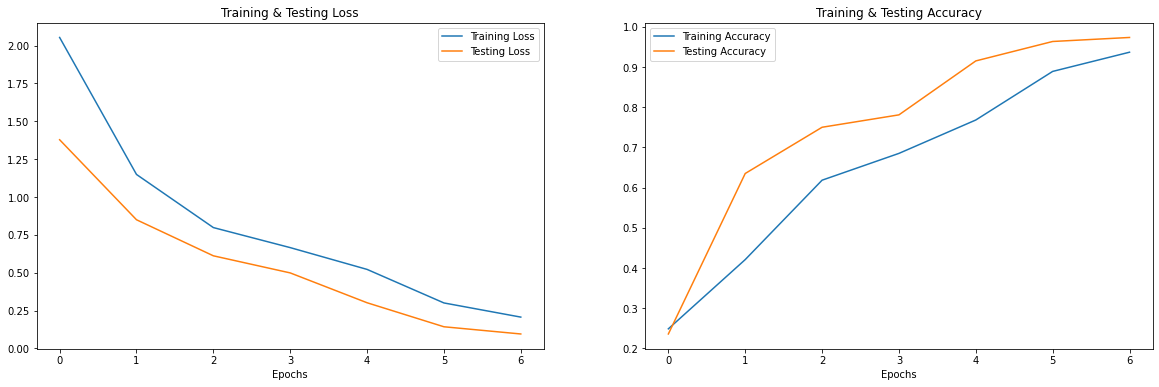

In [14]:
print("Accuracy of our model on test data : " , model_cnn.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(7)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [15]:
# predicting on test data.
pred_test_cnn = model_cnn.predict(x_test)
y_pred_cnn = encoder.inverse_transform(pred_test_cnn)

y_test_cnn = encoder.inverse_transform(y_test)

In [16]:
pred_test_cnn

array([[5.5944026e-03, 9.9132943e-01, 2.5453691e-03, 5.3072005e-04],
       [2.2665444e-07, 3.3181998e-08, 2.1214735e-08, 9.9999976e-01],
       [9.9980110e-01, 1.8242768e-05, 1.8014207e-04, 6.5076961e-07],
       ...,
       [9.9999714e-01, 5.9630857e-08, 2.7531971e-06, 3.1114938e-10],
       [1.4842162e-03, 3.8838785e-03, 9.9446255e-01, 1.6933259e-04],
       [1.3078176e-03, 1.0999247e-03, 9.2193764e-04, 9.9667031e-01]],
      dtype=float32)

In [17]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred_cnn.flatten()
df['Actual Labels'] = y_test_cnn.flatten()

df

,Predicted Labels,Actual Labels
0,fear,fear
1,sad,sad
2,angry,angry
3,fear,fear
4,fear,fear
...,...,...
1195,angry,angry
1196,fear,fear
1197,angry,angry
1198,happy,happy


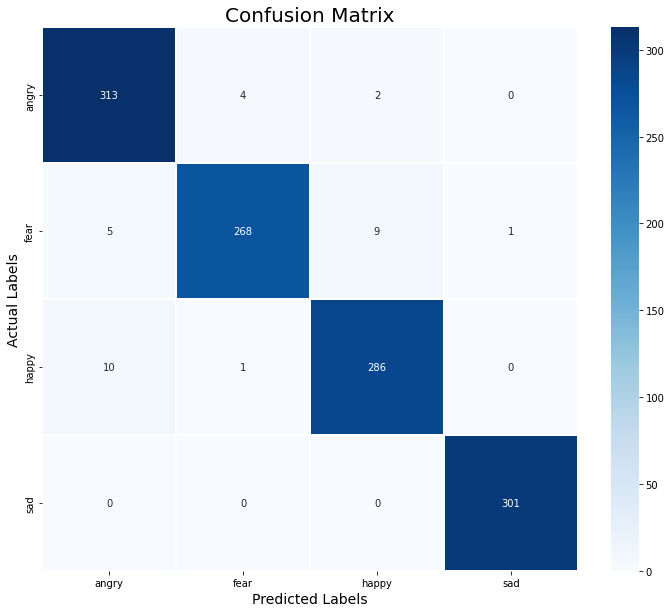

In [18]:
cm = confusion_matrix(y_test_cnn, y_pred_cnn)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [19]:
print(classification_report(y_test_cnn, y_pred_cnn))

              precision    recall  f1-score   support

       angry       0.95      0.98      0.97       319
        fear       0.98      0.95      0.96       283
       happy       0.96      0.96      0.96       297
         sad       1.00      1.00      1.00       301

    accuracy                           0.97      1200
   macro avg       0.97      0.97      0.97      1200
weighted avg       0.97      0.97      0.97      1200



# 4. Model CNN + LSTM

In [20]:
model_rcnn=Sequential()
model_rcnn.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model_rcnn.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model_rcnn.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model_rcnn.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model_rcnn.add(Dropout(0.2))

model_rcnn.add(LSTM(128, activation='relu', return_sequences=True))
model_rcnn.add(Dropout(0.2))

model_rcnn.add(LSTM(64, activation='relu'))
model_rcnn.add(Dropout(0.2))

model_rcnn.add(Dense(units=32, activation='relu'))
model_rcnn.add(Dropout(0.2))

model_rcnn.add(Dense(4, activation='softmax'))
model_rcnn.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model_rcnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 20, 256)           1536      
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 10, 256)          0         
 1D)                                                             
                                                                 
 conv1d_5 (Conv1D)           (None, 10, 256)           327936    
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 5, 256)           0         
 1D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 5, 256)            0         
                                                                 
 lstm (LSTM)                 (None, 5, 128)           

In [21]:
history=model_rcnn.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
57/57 [==============================] - 10s 121ms/step - loss: 1.6709 - accuracy: 0.2633 - val_loss: 1.3064 - val_accuracy: 0.4392
Epoch 2/10
57/57 [==============================] - 6s 112ms/step - loss: 1.2700 - accuracy: 0.3936 - val_loss: 0.8414 - val_accuracy: 0.5392
Epoch 3/10
57/57 [==============================] - 6s 112ms/step - loss: 0.8523 - accuracy: 0.6194 - val_loss: 0.5223 - val_accuracy: 0.7750
Epoch 4/10
57/57 [==============================] - 6s 111ms/step - loss: 0.6581 - accuracy: 0.6978 - val_loss: 0.4243 - val_accuracy: 0.8658
Epoch 5/10
57/57 [==============================] - 8s 143ms/step - loss: 0.5117 - accuracy: 0.7800 - val_loss: 0.2860 - val_accuracy: 0.8758
Epoch 6/10
57/57 [==============================] - 8s 149ms/step - loss: 0.4224 - accuracy: 0.8417 - val_loss: 0.2022 - val_accuracy: 0.9483
Epoch 7/10
57/57 [==============================] - 6s 112ms/step - loss: 0.3038 - accuracy: 0.9022 - val_loss: 0.1769 - val_accuracy: 0.9558
Epoch

38/38 [==============================] - 0s 12ms/step - loss: 0.0840 - accuracy: 0.9750
Accuracy of our model on test data :  97.50000238418579 %


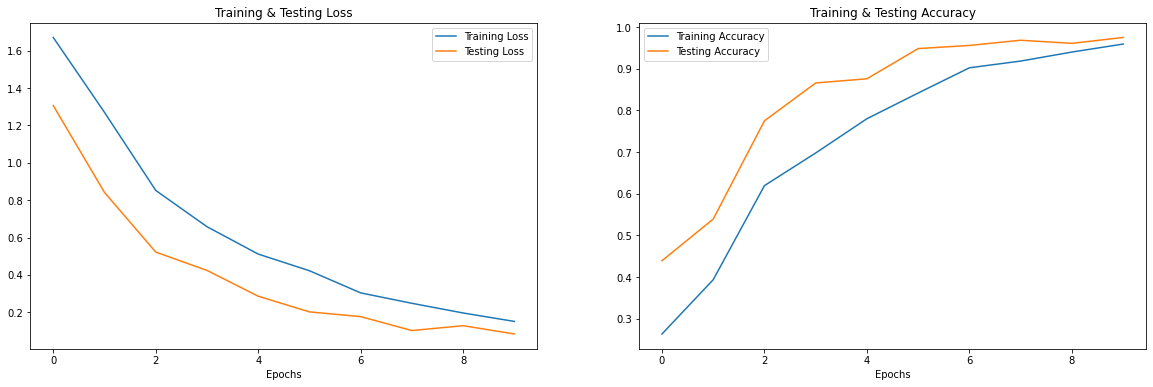

In [22]:
print("Accuracy of our model on test data : " , model_rcnn.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(10)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [23]:
# predicting on test data.
pred_test_rcnn = model_rcnn.predict(x_test)
y_pred_rcnn = encoder.inverse_transform(pred_test_rcnn)

y_test_rcnn = encoder.inverse_transform(y_test)

In [24]:
pred_test_rcnn

array([[8.3812520e-05, 9.9545032e-01, 4.4657830e-03, 7.8991228e-08],
       [1.7631586e-10, 4.1977749e-12, 4.9445283e-12, 1.0000000e+00],
       [9.9989474e-01, 6.9418791e-05, 3.4532768e-05, 1.2676707e-06],
       ...,
       [9.9999690e-01, 1.5496571e-06, 1.5068946e-06, 1.2767849e-08],
       [2.4066929e-05, 1.8375879e-04, 9.9978083e-01, 1.1375721e-05],
       [1.7622642e-05, 3.5527878e-06, 5.3470208e-06, 9.9997354e-01]],
      dtype=float32)

In [25]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred_rcnn.flatten()
df['Actual Labels'] = y_test_rcnn.flatten()

df

,Predicted Labels,Actual Labels
0,fear,fear
1,sad,sad
2,angry,angry
3,fear,fear
4,fear,fear
...,...,...
1195,angry,angry
1196,fear,fear
1197,angry,angry
1198,happy,happy


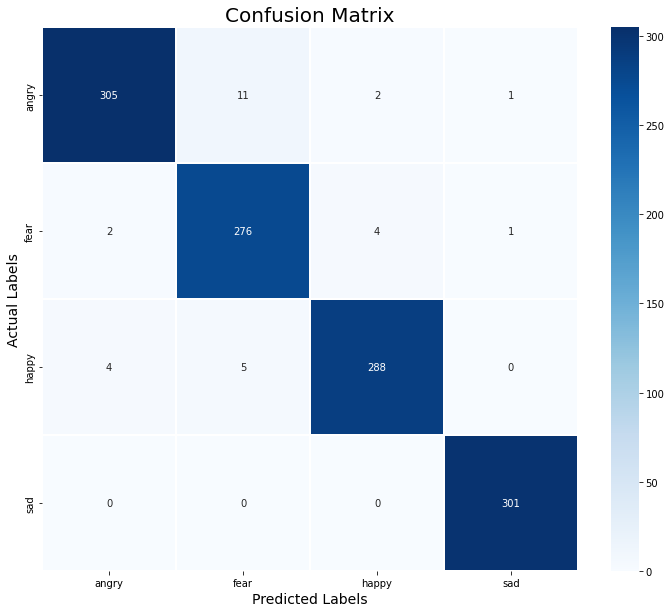

In [26]:
cm = confusion_matrix(y_test_rcnn, y_pred_rcnn)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [27]:
print(classification_report(y_test_rcnn, y_pred_rcnn))

              precision    recall  f1-score   support

       angry       0.98      0.96      0.97       319
        fear       0.95      0.98      0.96       283
       happy       0.98      0.97      0.97       297
         sad       0.99      1.00      1.00       301

    accuracy                           0.97      1200
   macro avg       0.97      0.98      0.97      1200
weighted avg       0.98      0.97      0.98      1200



In [28]:
# saved_model = model_rcnn.save('model emotion.h5')

In [29]:
# def get_features(path):
#     # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
#     data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    
#     result = np.array([])
#     # MFCC
#     mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
#     result = np.hstack((result, mfcc)) # stacking horizontally
    
#     result = np.array(result)
    
#     return result

In [30]:
# from tensorflow.keras.models import load_model
# suara = '/content/drive/MyDrive/data audio/OAF_Sad/OAF_bath_sad.wav'
# model = load_model('model emotion.h5')
# X__ = []
# feature = get_features(suara)
# for ele in feature:
#   X__.append(ele)
# X__Test = np.array(X__).reshape(1,-1)
# test_input = np.expand_dims(X__Test, axis=2)
# pred_test__ = model.predict(test_input)
# predicted_label=np.argmax(pred_test__,axis=1)
# print(predicted_label)